#  Support Vector Machine

### SVM Introduction

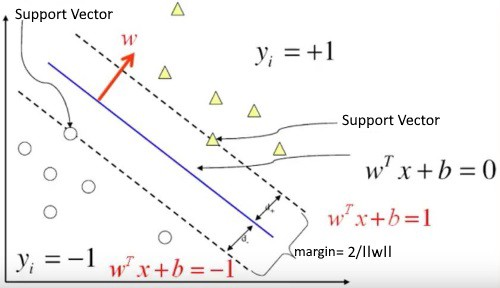

The SVM (Support Vector Machine) is a supervised machine learning algorithm typically used for binary classification problems. It’s trained by feeding a dataset with labeled examples (xᵢ, yᵢ). For instance, if your examples are email messages and your problem is spam detection, then:
- An example email message xᵢ is defined as an n-dimensional feature vector that can be plotted on n-dimensional space.
- The feature vector, as the name explains, contains features (eg. word count, link count, etc.) of your email message in numerical form.
- Each feature vector is labeled with a class yᵢ.
- The class yᵢ can either be a +ve or -ve (eg. spam=1, not-spam=-1).


Using this dataset the algorithm finds a hyperplane (or decision boundary) which should ideally have the following properties:

- It creates separation between examples of two classes with a maximum margin.
- Its equation (w.x + b = 0) yields a value ≥ 1 for examples from+ve class and ≤-1 for examples from -ve class.

### How SVMs find an optimal hyper-plane?
By finding the optimal values w* (weights/normal) and b* (intercept) which define this hyperplane. The optimal values are found by minimizing a cost function. Once the algorithm identifies these optimal values, the SVM model f(x) is then defined as shown below:


$$f(x) = sign(W^*x + b)$$

#### Before we move any further let’s import the required packages for this tutorial

In [1]:
import numpy as np # for handeling multi-dimensional array operations
import pandas as pd # for reading data from csv
from sklearn.preprocessing import StandardScaler # for standardization
from sklearn.model_selection import train_test_split as tts # for dividing the datset into train and test set
from sklearn.metrics import accuracy_score, recall_score, precision_score # for different inference metrics
from sklearn.utils import shuffle # for shuffling the data

In [2]:
# reading the csv file 
data = pd.read_csv('breast_cancer_data.csv')
# showing the first five records from the dataset
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# as SVMs along with any other machine learning only accept 
# numerical features so we will change the "M" and "B"
# from our diagnosis column
data['diagnosis'] = data['diagnosis'].map({'M':1.0, 'B':-1.0})
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# here we are dropping the unnecessary columns created by pandas
# as we don't need them
data.drop(data.columns[[-1,0]], axis=1, inplace=True)

In [5]:
# here we are separating our dependant feature
# from our independant features
# since we want to predict the class of the
# diagnosis report so, here 'diagnosis' is our dependant feature
# and apart from that every other column is our independant feature
X = data.iloc[:, 1:].values
Y = data.iloc[:, 0].values

In [6]:
# we are splitting the dataset into train set and test set
# we need to do it so we can have an idea that how my model
# will perform on any unseen data
# here the train set will be the data on which our model will
# get trained. And after that we will check the model's 
# performance on the test set.
x_train, x_test, y_train, y_test = tts(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [7]:
# since the variation of different features may confuse the model
# we should always scale the features down to a certain range
# some of the algorithms do this internally but since SVM is not
# one of those so, we should always do this step before training.
# here we are standardizing the features.
# there are other normalization techniques too(eg- MinMaxScaler).
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

### Cost Function:
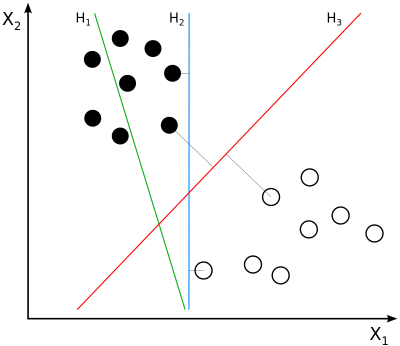
Also known as the Objective Function. One of the building blocks of every machine learning algorithm, it’s the function we try to minimize or maximize to achieve our objective.


#### What’s our objective in SVM?
Our objective is to find a hyperplane that separates +ve and -ve examples with the largest margin while keeping the misclassification as low as possible.


#### How do we achieve this objective?
We will minimize the cost/objective function shown below:


$$\mathscr{L}(\mathbf{w},\mathbf{b}) = \frac{\|\mathbf{w}\|^2}{2} + c\left[\frac{1}{N}\sum_{i=1}^{N} max(0, 1-y_i(\mathbf{w}^Tx_i+b))\right]$$

Here the first part is the margin and the part multiplied by 'c' is called "Hinge Loss".

The value if 'c' is always > 0.
The higher the value of 'c' the model tends to overfit to the training data and the smaller the value, the model tends to undrfit to the same.

Let’s see how can we calculate the total cost as given in the equation and then we will move on to its gradient which will be used in the training phase to minimize it:

### The Gradient of the Cost Function:
for calculating the gradient for w$$\frac{\partial \mathscr{L}(\mathbf{w},b)}{\partial \mathbf{w}} = \frac{1}{N}\sum_{i=1}^{N}w$$
if $$max(0, 1-y_i(\mathbf{w}^Tx+b))=0$$
otherwise, the value is $$\mathbf{w}-Cy_ix_i$$
similarly for b$$\frac{\partial \mathscr{L}(\mathbf{w},b)}{\partial \mathbf{b}} = \frac{1}{N}\sum_{i=1}^{N}0$$
if$$max(0, 1-y_i(\mathbf{w}^Tx+b))=0$$
otherwise, the value is $$\mathbf-Cy_i$$

In [51]:
# we are creating a class called svc
# we will be implemnting a basic Support-Vector_Classifier
class SVC:
    
    # we are passing c and tolerence to the init function
    def __init__(self, c=1.0, tol=0.001):
        self.c = c
        self.tol = tol
        self.lr = 0.0001
        self.w = None
        self.b = None
    
    #This function will calculate the cost
    def calculate_cost(self, X, Y):
        N = X.shape[0]
        zitas = 1 - Y*np.dot(X, self.w)
        zitas[zitas<0] = 0
        hinge_loss = self.c * (np.sum(zitas)/N)
        
        cost = 1/2*np.dot(self.w, self.w) + hinge_loss
        
        return cost
    
    # This function will calculate the gardients
    def calculate_gradients(self, x_batch, y_batch):
        if type(y_batch) == np.float64:
            y_batch = np.array([y_batch])
            x_batch = np.array([x_batch])
        
        zitas = 1 - (y_batch*np.dot(x_batch, self.w))
        dw = np.zeros(len(self.w))
        db = 0
        
        for ind, z in enumerate(zitas):
            if max(0, z) == 0:
                di = self.w
                dj = 0
            else:
                di = self.w - (self.c* y_batch[ind]* x_batch[ind])
                dj = -(self.c * y_batch[ind])
            dw += di
            db += dj
    
        return dw/len(y_batch), db/len(y_batch)
    
    # this method will be used to fit the model to the 
    # training data 
    def fit(self, X, Y):
        self.w = np.zeros(X.shape[1])
        self.b = 0
        nth = 0
        prev_cost = float('inf')
    
        while(True):
            X, Y = shuffle(X, Y)
            for ind, x in enumerate(X):
                dw, db = self.calculate_gradients(x, Y[ind])
                self.w = self.w - (self.lr*dw)
                self.b = self.b - (self.lr*db)
                
            cost = self.calculate_cost(X, Y)
            if abs(prev_cost-cost) < (self.tol*prev_cost):
                return
            prev_cost = cost
    
    # this function is used to predict the
    # results for the test data
    def predict(self, X):
        y_pred = []
        for ind, x in enumerate(X):
            y = np.sign(np.dot(self.w, x) + self.b)
            y_pred.append(y)
        
        return np.array(y_pred)

In [56]:
# creating an object of the classifier
clf = SVC()
# fitting the training data
clf.fit(x_train, y_train)
# making predictions to the test data
y_pred = clf.predict(x_test)
# checking the accuracy of the model
# with respect to the test data
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
# checking the recall 
print(f'Recall: {recall_score(y_test, y_pred)}')
# checking the precision
print(f'Precision: {precision_score(y_test, y_pred)}')

Accuracy: 0.9736842105263158
Recall: 0.9523809523809523
Precision: 0.975609756097561


This formulation of SVM is call Linear SVM. Lets look at the implementation of the same in sklearn.

In [9]:
# importing the LinearSVC classifier which is 
# made for us for easy usage
from sklearn.svm import LinearSVC
# creating an object of the LinearSVC class
clf = LinearSVC()
# fitting the training data
clf.fit(x_train, y_train)
# making predictions to the test data
y_pred = clf.predict(x_test)
# checking the accuracy
print(accuracy_score(y_test, y_pred))
# checking the recall
print(recall_score(y_test, y_pred))
# checking the precision
print(precision_score(y_test, y_pred))

0.956140350877193
0.9523809523809523
0.9302325581395349


But the problem with Linear form of SVM is that it can only be used for linearly seperable datasets.
There is another form of SVM called the Dual form.
The equation looks something like this - 
$$\sum_{i=1}^{n}\alpha_i-\frac{1}{2}\sum_{i=1}^{n}\sum_{j=1}^{n}\alpha_i\alpha_jy_iy_jx_i^Tx_j$$
such that$$\sum_{i=1}^{n}\alpha_iy_i=0, C>=\alpha_i>=0$$
In the above equation we have to maximize the value of alpha and the above term $x_i^Tx_j$ can be replaced by the term $k(x_i, x_j)$, called the kernel function.If we use the term $x_i^Tx_j$ as it is then it is same as Linear SVM.

Now for every $x_i$ there is a correponding $\alpha_i$ and the value of $\alpha_i>0$ for only the support vectors for the other points its value is 0. So, we only need the support vectors to make a prediction for a new query point.
For a query point $x_q$ $$f(x_q)=\sum_{i=1}^{n}\alpha_iy_ik(x_i, x_q)+b$$ 

# Kernel SVM

This kernel trick makes SVM so powerful. For non-linearly seperable data we can use Kernel SVM. Kernel SVM works like feature transformation, the idea is to tranform the feature such that if the features is in d-dimention it moves them to a higher dimension d_hat. The data is not linearly seperable in dimension d but maybe they are linearly seperable in dimension d_hat.The two most popular kernel in SVM are- 1. Polynomial kernel and 2. RBF kernel.

## Polynomial Kernel

It can be used for non-linearly seperable data. The formula for polynomial kernel looks like-
$$k(x_1, x_2)=(x_1^Tx_2+c)^d$$
where c and d are 2 constants.

## Radial Basis Function(RBF)

For SVM, RBF is the most popular/general purpose kernel because of its similarity with KNN. It is also called Gaussian kernel because the function curve of RBF looks like Gaussian Distribution.

The formula of RBF kernel looks like-
$$k_RBF(x_1, x_2)=exp(\frac{-\|x_1-x_2\|^2}{2\sigma^2})$$
here $\sigma$ is a hyperparameter.

Now, we will take a look into the implementation of Polynomial and RBF kernel in sklearn.

In [10]:
from sklearn.svm import SVC
# creating an object of the SVC class with kernel='poly' which means we are using polynomial kernel
clf_poly = SVC(kernel='poly')
# fitting the training data
clf_poly.fit(x_train, y_train)
# making predictions to the test data
y_pred = clf_poly.predict(x_test)
# checking the accuracy
print(accuracy_score(y_test, y_pred))
# checking the recall
print(recall_score(y_test, y_pred))
# checking the precision
print(precision_score(y_test, y_pred))

0.9298245614035088
0.8095238095238095
1.0


In [11]:
from sklearn.svm import SVC
# creating an object of the SVC class with kernel='rbf' which means we are using RBF kernel
clf_rbf = SVC(kernel='rbf')
# fitting the training data
clf_rbf.fit(x_train, y_train)
# making predictions to the test data
y_pred = clf_rbf.predict(x_test)
# checking the accuracy
print(accuracy_score(y_test, y_pred))
# checking the recall
print(recall_score(y_test, y_pred))
# checking the precision
print(precision_score(y_test, y_pred))

0.9824561403508771
0.9761904761904762
0.9761904761904762


So, we can see the RBF kernel is performing way better than the Polynomial kernel, so if we don't know which kernel to use for a specific use case just go for RBF, of couse there are many domain specific kernels for SVM. If we pick the right kernel for SVM, then it will work like a charm. 

# Nu-SVM

The original formulation of SVM is using the hyperparameter "C" which is called as C-SVM, $C>=0$.

There is an alternative formulation of soft-margin SVM where the hyperparameter is "nu". It is called nu-SVM, $0<=nu<=1$.

From the value of "nu" we can get an estimate of the number of support vectors.

$nu>=$fraction of errors

$nu<=$fraction of number of support vectors

Here we will see how we can use nu-svm in sklearn

In [13]:
from sklearn.svm import NuSVC
# creating an object of the NuSVC with nu=0.5
# means we will tolerate upto 50% error 
#and number of support vectors will be >= 50% of data points
clf_nu = NuSVC(nu=0.5)
# fitting the training data
clf_nu.fit(x_train, y_train)
# making predictions to the test data
y_pred = clf_nu.predict(x_test)
# checking the accuracy
print(accuracy_score(y_test, y_pred))
# checking the recall
print(recall_score(y_test, y_pred))
# checking the precision
print(precision_score(y_test, y_pred))

0.9298245614035088
0.8809523809523809
0.925


# References

1. https://towardsdatascience.com/svm-implementation-from-scratch-python-2db2fc52e5c2
2. Hands on Machine-Learning with Scikit-Learn, Tensorflow and Keras by O'Reilly 2nd Edition